In [2]:
# Basic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ML tools
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA

# Load iris dataset

In [3]:

iris = load_iris()
X = iris.data
y = iris.target

# Feature and class names
feature_names = iris.feature_names
target_names = iris.target_names

# Display first 5 rows
pd.DataFrame(X, columns=feature_names).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Normalize features using StandardScaler

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into 80% train and 20% test

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Training KNN

In [6]:
accuracies = []
k_values = range(1, 16)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"K = {k} → Accuracy = {acc:.2f}")

K = 1 → Accuracy = 0.97
K = 2 → Accuracy = 1.00
K = 3 → Accuracy = 1.00
K = 4 → Accuracy = 1.00
K = 5 → Accuracy = 1.00
K = 6 → Accuracy = 1.00
K = 7 → Accuracy = 1.00
K = 8 → Accuracy = 1.00
K = 9 → Accuracy = 1.00
K = 10 → Accuracy = 1.00
K = 11 → Accuracy = 1.00
K = 12 → Accuracy = 1.00
K = 13 → Accuracy = 1.00
K = 14 → Accuracy = 1.00
K = 15 → Accuracy = 1.00


# Plotting Accuracy vs K

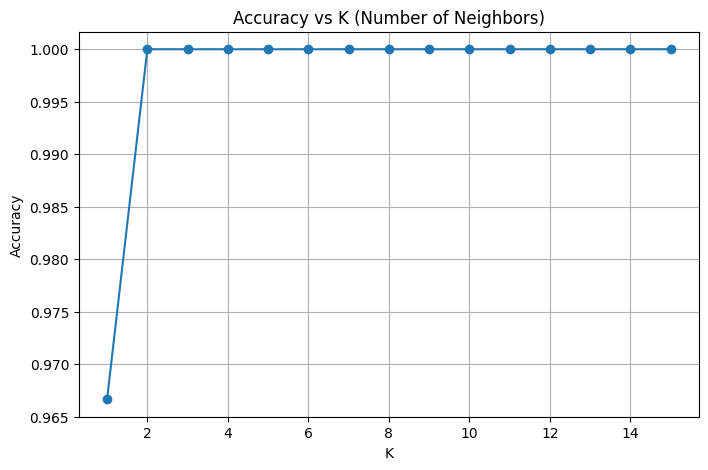

In [7]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.title("Accuracy vs K (Number of Neighbors)")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

# Find best K

In [8]:
best_k = k_values[np.argmax(accuracies)]
print(f"✅ Best K: {best_k} with Accuracy: {max(accuracies):.2f}")

# Train with best K
final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train, y_train)
y_pred = final_knn.predict(X_test)


✅ Best K: 2 with Accuracy: 1.00


# Classification report

📊 Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



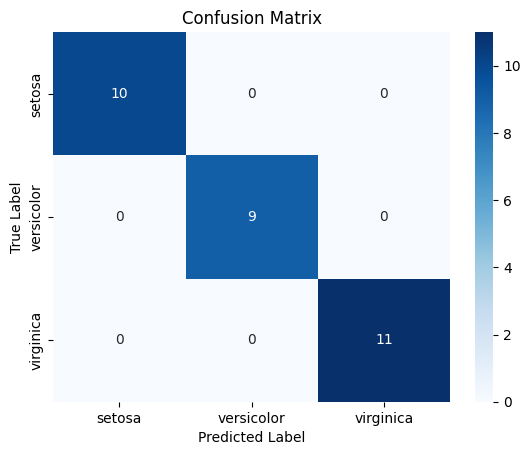

In [9]:
print("📊 Classification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt='d', xticklabels=target_names, yticklabels=target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
